# LGM- VIRTUAL INTERNSHIP PROGRAM : DATA SCIENCE

# TASK-1 Iris Classification using ML

<b>AUTHOR: SEJAL AHIRE</b>

<b>BATCH: SEPTEMBER 2021</b>

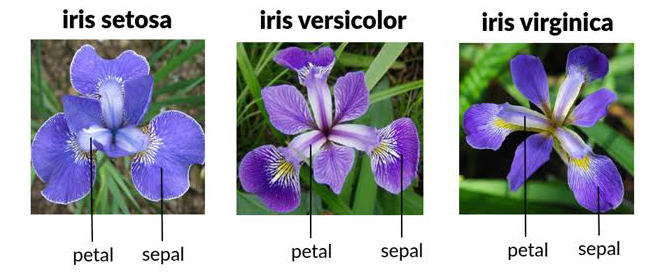

In [88]:
from PIL import Image
Image.open("iris_img1.png")

# Import Libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Load dataset

In [98]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [91]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

<b>Converting dataset into pandas</b>

In [93]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()  # frst 5 rows 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [94]:
display(df.tail())  # last 5 rows
print("shape-",df.shape) #shape of dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


shape- (150, 4)


In [95]:
df.dtypes #datatypes in dataset

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [24]:
df.info() # non-null value counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [25]:
df.isnull().sum()       # null value count

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

<b>Descriptive Ananlysis</b>

In [102]:
df.describe()
#counts mean, median, mode, max value, min value, quartiles and standard deviation of the dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
df["lables"]=Iris.target
print(df.groupby("lables").size())

lables
0    50
1    50
2    50
dtype: int64


<b>Correlation</b>

In [32]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),lables
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
lables,0.782561,-0.426658,0.949035,0.956547,1.000000


# Data Visualization

<b>(1)Scatter Plot</b>

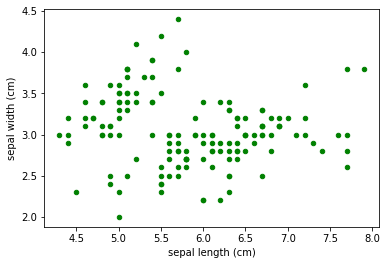

In [44]:
df.plot(kind="scatter",x="sepal length (cm)",y="sepal width (cm)",color="green",alpha=1);

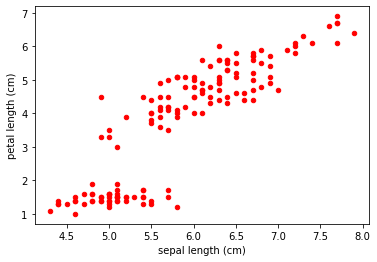

In [47]:
df.plot(kind="scatter",x="sepal length (cm)",y="petal length (cm)",color="red",alpha=1);

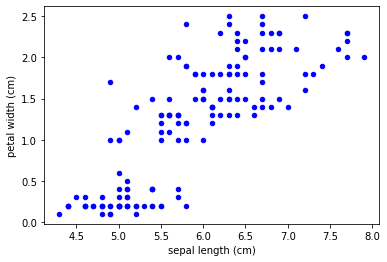

In [49]:
df.plot(kind="scatter",x="sepal length (cm)",y="petal width (cm)",color="blue",alpha=1);

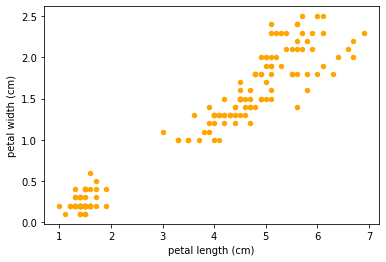

In [50]:
df.plot(kind="scatter",x="petal length (cm)",y="petal width (cm)",color="orange",alpha=1);

<b>(2)Violin Plot</b>

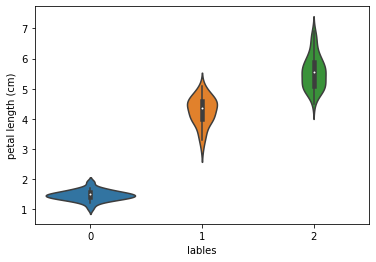

In [51]:
sns.violinplot(x='lables',y='petal length (cm)',data=df)
plt.show()

<b>(3)Box Plot</b>

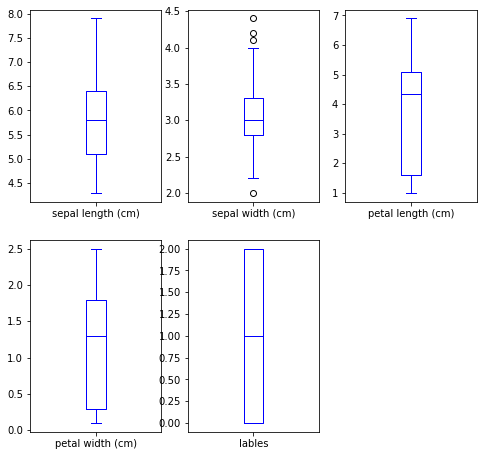

In [55]:
df.plot(kind='box', color='blue', subplots=True, layout=(3,3),figsize=(8,12));

<b>(4)Histogram</b>

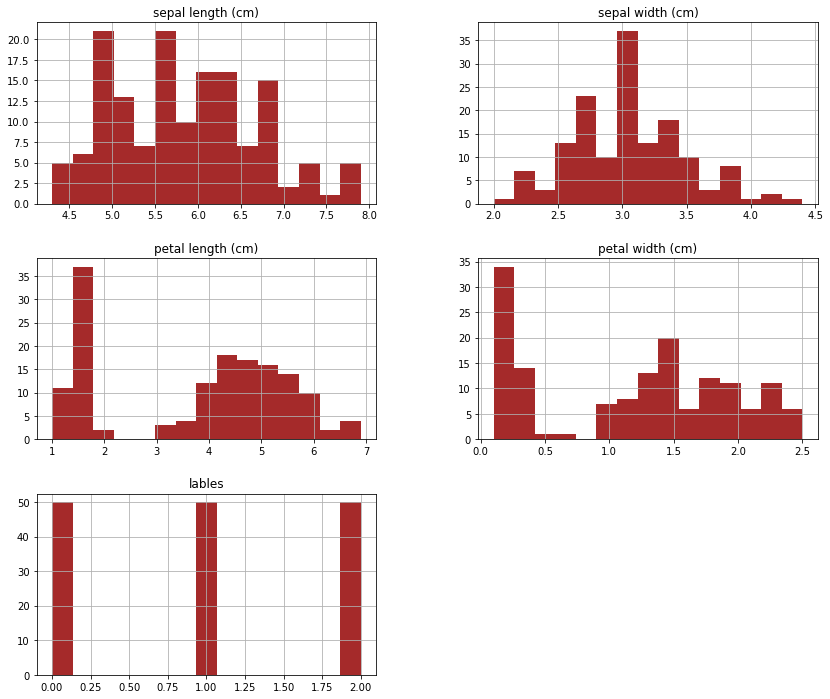

In [63]:
df.hist(bins=15, color='brown', figsize=(14,12),);

# Splitting and Testing

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [66]:
print('X train: {}'.format(X_train.shape))
print('y train: {}'.format(y_train.shape))
print('X test: {}'.format(X_test.shape))
print('y test: {}'.format(y_test.shape))

X train: (105, 4)
y train: (105, 1)
X test: (45, 4)
y test: (45, 1)


# Applying KNN model

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [71]:
knn_model = KNeighborsClassifier(n_neighbors=3)

<b>Fitting the model</b>

In [72]:
knn_model.fit(X_train, y_train)

<ipython-input-72-7598cdf03e27>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

<b>Predicting the Test set results</b>

In [73]:
y_pred = knn_model.predict(X_test)

In [75]:
display(y_pred)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

<b>Calculate Accuracy</b>

In [76]:
accuracy = accuracy_score(y_test, y_pred) * 100
%display('Accuracy of our model is: ' + str(round(accuracy,2)) + '%.')

'Accuracy of our model is: 97.78%.'

# Applying Random Forest Model

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rf_model = RandomForestClassifier(random_state=0)

In [80]:
rf_model.fit(X_train, y_train)

<ipython-input-80-ce45b449cc1f>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [81]:
rf_predict = rf_model.predict(X_test)

In [82]:
rf_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

<b>Calculate Accuracy</b>

In [85]:
y_predict = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict) * 100
print('Accuracy of our model is: ' + str(round(accuracy,2)) + '%.')

Accuracy of our model is: 97.78%.


# Conculsion

K-Nearest Neighbors classifiers have  accuracy of 97.78%

Random forest classifiers  the have Accuracy of 97.78%